## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
# File location and type
file_location = "/FileStore/tables/insurance.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

claim,payment
108,392.5
19,46.2
13,15.7
124,422.2
40,119.4
57,170.9
23,56.9
14,77.5
45,214.0
10,65.3


In [0]:
pandadf=df.toPandas()
pandadf

,claim,payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [0]:
x=pandadf.iloc[:,:-1]

In [0]:
y=pandadf.iloc[:,1:]

In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Predict using the trained model
predictions = model.predict(x)

# Print the slope (coefficient) and intercept of the fitted line
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)



Slope: [3.41393412]
Intercept: [20.03163586]


In [0]:
from sklearn.model_selection import train_test_split

# Assuming you have X as your feature matrix and y as your target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [0]:
# Create a view or table

temp_table_name = "insurance_csv"

df.createOrReplaceTempView(temp_table_name)

In [0]:
%sql
SELECT 
    (COUNT(*) * SUM(claim * payment) - SUM(claim) * SUM(payment)) /
    (COUNT(*) * SUM(claim * claim) - SUM(claim) * SUM(claim)) AS slope
FROM `insurance_csv`;

slope
3.4139341237580965


In [0]:
%sql
SELECT
    (SUM(payment) - slope_query.slope * SUM(claim)) / COUNT(*) AS intercept
FROM (
    SELECT
        (COUNT(*) * SUM(claim * payment) - SUM(claim) * SUM(payment)) /
        (COUNT(*) * SUM(claim * claim) - SUM(claim) * SUM(claim)) AS slope
    FROM `insurance_csv`
) AS slope_query
JOIN insurance_csv ON 1 = 1
GROUP BY slope;;

intercept
20.031635863762975


In [0]:
from sklearn.model_selection import train_test_split

# Assuming you have X as your feature matrix and y as your target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model to the data
model.fit(X_train, y_train)

# Print the slope (coefficient) and intercept of the fitted line
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)



Slope: [3.42918573]
Intercept: [16.74120404]


Out[10]: <matplotlib.collections.PathCollection at 0x7f370ba00af0>

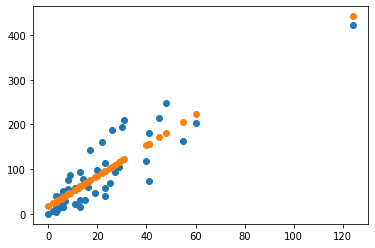

In [0]:
import matplotlib.pyplot as plt
predict=model.predict(X_train)
plt.scatter(X_train, y_train)
plt.scatter(X_train, predict)

Out[12]: <matplotlib.collections.PathCollection at 0x7f37038c44c0>

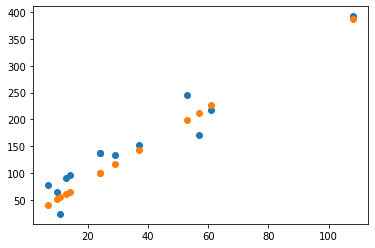

In [0]:
import matplotlib.pyplot as plt
predict=model.predict(X_test)
plt.scatter(X_test, y_test)
plt.scatter(X_test, predict)

In [0]:
# With this registered as a temp view, it will only be available to this particular notebook. If you'd like other users to be able to query this table, you can also create a table from the DataFrame.
# Once saved, this table will persist across cluster restarts as well as allow various users across different notebooks to query this data.
# To do so, choose your table name and uncomment the bottom line.

permanent_table_name = "insurance_csv"

# df.write.format("parquet").saveAsTable(permanent_table_name)